https://www.kaggle.com/code/msripooja/steps-to-convert-audio-clip-to-spectrogram

In [32]:
import warnings

warnings.filterwarnings('ignore')

In [33]:
import random
import numpy as np

random.seed(34)
np.random.seed(34)

In [34]:
from utils import *

In [35]:
X_train, y_train = generate_dataset(directory='./TrainingData', MAX_LEN=170)

In [36]:
X_test, y_test = generate_dataset(directory='./TestingData', MAX_LEN=170)

In [37]:
X_train.shape

(120, 170, 33)

In [38]:
X_test.shape

(40, 170, 33)

In [39]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, accuracy_score

In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

## Hyperparameter Fine-tuning

In [45]:
best_model = None
best_history = None
best_acc = 0

learning_rates = [1e-4, 1e-3, 2e-3, 2.5e-3, 1e-2]
dropouts = [0.1, 0.2, 0.3, 0.35, 0.4, 0.5]
epochs = [20, 30, 40, 50, 60, 70]

for lr in learning_rates:
    for dp in dropouts:
        for ep in epochs:
            model = models.Sequential([
                layers.Conv1D(16, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
                layers.MaxPooling1D(pool_size=2),
                layers.Conv1D(32, kernel_size=3, activation='relu'),
                layers.MaxPooling1D(pool_size=2),
                layers.Flatten(),
                layers.Dense(32, activation='relu', kernel_regularizer='l2'),
                layers.Dropout(dp),
                layers.Dense(1, activation='sigmoid')
            ])
            
            model.compile(optimizer=Adam(learning_rate=2e-3), loss='mean_squared_error', metrics=['accuracy'])

            history = model.fit(
                X_train, y_train,
                epochs=50,
                batch_size=16,
                validation_split=0.2,
                verbose=0
            )

            test_loss, test_accuracy = model.evaluate(X_test, y_test)
            print(f"Learning Rate: {lr}, Dropout: {dp}, Epochs: {ep}")
            print(f"Test Accuracy: {test_accuracy:.2f}")

            if test_accuracy > best_acc:
                best_model = model
                best_history = history
                best_acc = test_accuracy

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6958 - loss: 0.2444
Learning Rate: 0.0001, Dropout: 0.1, Epochs: 20
Test Accuracy: 0.70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7500 - loss: 0.1853
Learning Rate: 0.0001, Dropout: 0.1, Epochs: 30
Test Accuracy: 0.75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7833 - loss: 0.2067
Learning Rate: 0.0001, Dropout: 0.1, Epochs: 40
Test Accuracy: 0.80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7021 - loss: 0.2706
Learning Rate: 0.0001, Dropout: 0.1, Epochs: 50
Test Accuracy: 0.73
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7396 - loss: 0.2555
Learning Rate: 0.0001, Dropout: 0.1, Epochs: 60
Test Accuracy: 0.75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6792 - loss: 0.2498
Learning Rate: 0.0001, Dropout: 0.1, Epochs: 70
Test Accuracy: 0.68
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6687 - loss: 0.2655
Learning Rate: 0.0001, Dropout: 0.2, Epochs: 20
Test Accuracy: 0.68
2/2 ━━━━━━━━━━━━━━━━

In [46]:
y_pred = best_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int) 

print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x3dae220e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.78      0.90      0.84        20

    accuracy     

In [47]:
def plot_training_history(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

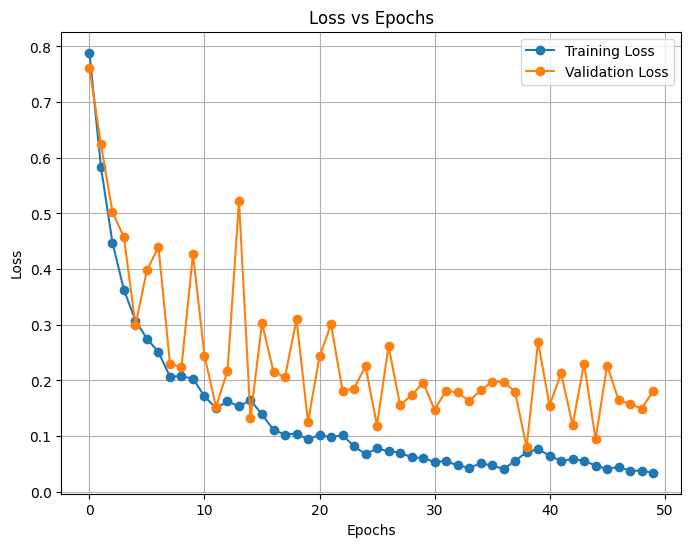

In [48]:
plot_training_history(best_history)